In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Import all necessary libraries / modules that will be required for data cleaning and visualization purposes

In [3]:
sales = pd.read_csv('/Users/mahinbindra/Downloads/sales_data.csv')
# Create variable 'sales' and read the csv data file onto that variable using pandas object

In [4]:
sales
# Output the sales_data

,Product,Region,Price,Units Sold,Sale Date
0,NaN,Region_6,75.96,10.0,2022-01-01
1,NaN,Region_1,175.78,8.0,2022-01-02
2,Product_46,Region_3,20.43,12.0,2022-01-03
3,Product_36,Region_1,12.77,10.0,2022-01-04
4,Product_17,Region_6,125.69,6.0,2022-01-05
...,...,...,...,...,...
1045,Product_45,Region_7,78.69,8.0,2022-07-28
1046,Product_1,Region_6,NaN,8.0,2022-08-02
1047,Product_17,Region_2,114.37,11.0,2023-12-18
1048,NaN,Region_8,NaN,5.0,2023-12-27


In [10]:
sales.describe(include='all')
# Calculate various parameters and statistical values about the data set

,Product,Region,Price,Units Sold,Sale Date
count,947,946,945.000000,946.000000,1050
unique,50,10,NaN,NaN,1000
top,Product_45,Region_9,NaN,NaN,2022-07-28
freq,28,109,NaN,NaN,2
mean,NaN,NaN,107.598688,10.048626,NaN
std,NaN,NaN,124.020322,3.172261,NaN
min,NaN,NaN,0.200000,2.000000,NaN
25%,NaN,NaN,29.430000,8.000000,NaN
50%,NaN,NaN,78.130000,10.000000,NaN
75%,NaN,NaN,142.570000,12.000000,NaN


In [6]:
sales.info()
# Gather further information about data type of each attribute and null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     947 non-null    object 
 1   Region      946 non-null    object 
 2   Price       945 non-null    float64
 3   Units Sold  946 non-null    float64
 4   Sale Date   1050 non-null   object 
dtypes: float64(2), object(3)
memory usage: 41.1+ KB


In [14]:
sales.head()
# Getting the first 5 values of the data set using the head function

,Product,Region,Price,Units Sold,Sale Date
0,NaN,Region_6,75.96,10.0,2022-01-01
1,NaN,Region_1,175.78,8.0,2022-01-02
2,Product_46,Region_3,20.43,12.0,2022-01-03
3,Product_36,Region_1,12.77,10.0,2022-01-04
4,Product_17,Region_6,125.69,6.0,2022-01-05


In [17]:
type(sales)
# Knowing the data type of the sales_data dataset

pandas.core.frame.DataFrame

In [18]:
sales.shape
# Total numbers of rows and columns in the given data set

(1050, 5)

In [ ]:
Data Cleaning begins hereon

In [22]:
sales.loc[sales['Product'].isnull()]
# Identify any null values in the 'Product' column

,Product,Region,Price,Units Sold,Sale Date
0,NaN,Region_6,75.96,10.0,2022-01-01
1,NaN,Region_1,175.78,8.0,2022-01-02
18,NaN,NaN,276.27,9.0,2022-01-19
21,NaN,NaN,46.10,14.0,2022-01-22
27,NaN,Region_10,193.85,10.0,2022-01-28
...,...,...,...,...,...
995,NaN,Region_7,31.83,13.0,2024-09-22
997,NaN,Region_7,311.80,13.0,2024-09-24
1021,NaN,Region_2,108.89,7.0,2023-05-22
1024,NaN,Region_7,99.98,8.0,2023-07-21


In [34]:
sales.drop_duplicates(inplace=True)
# Drop all duplicate values from the data to avoid redundancy

In [134]:
sales_update = sales.dropna(subset = ['Product', 'Region'])
# Drop all null values from the Product and Region columns to avoid having any missing values in the dataset

In [135]:
sales_update.info()
# Gather information about the updated dataset post removal of all duplicates and missing values from Product and Region column

<class 'pandas.core.frame.DataFrame'>
Index: 810 entries, 2 to 999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     810 non-null    object 
 1   Region      810 non-null    object 
 2   Price       725 non-null    float64
 3   Units Sold  731 non-null    float64
 4   Sale Date   810 non-null    object 
dtypes: float64(2), object(3)
memory usage: 38.0+ KB


In [136]:
sales_update.head()

,Product,Region,Price,Units Sold,Sale Date
2,Product_46,Region_3,20.43,12.0,2022-01-03
3,Product_36,Region_1,12.77,10.0,2022-01-04
4,Product_17,Region_6,125.69,6.0,2022-01-05
5,Product_45,Region_1,8.63,11.0,2022-01-06
6,Product_31,Region_3,23.73,6.0,2022-01-07


In [138]:
sorted = sales_update.groupby('Product')
# Grouping the dataset by product to assess presence and sale of various products across regions

In [123]:
sorted.groups
# Read created group by Product

{'Product_1': [11, 13, 15, 34, 88, 140, 213, 265, 312, 393, 407, 467, 563, 609, 711, 848, 931, 964, 994], 'Product_10': [47, 84, 220, 253, 294, 375, 397, 449, 599, 643, 673, 754, 895, 934], 'Product_11': [26, 70, 256, 361, 371, 391, 455, 809, 868, 971], 'Product_12': [59, 172, 173, 245, 311, 521, 536, 576, 627, 801, 882], 'Product_13': [25, 35, 49, 94, 113, 156, 204, 237, 295, 326, 343, 364, 389, 403, 522, 621, 676, 720, 746, 752, 807, 892, 954, 962], 'Product_14': [22, 230, 232, 264, 351, 468, 473, 546, 574, 651, 672, 832, 845, 889, 978], 'Product_15': [92, 217, 286, 356, 510, 552, 588, 595, 667, 745, 780, 834, 849, 924, 958, 969, 980], 'Product_16': [8, 146, 153, 180, 275, 466, 491, 505, 547, 674, 721, 735, 783, 796, 819, 914, 916, 930], 'Product_17': [4, 17, 51, 71, 72, 122, 148, 192, 227, 267, 313, 533, 614, 624, 712, 716, 739, 741], 'Product_18': [7, 65, 67, 249, 252, 254, 316, 376, 383, 502, 523, 899, 942], 'Product_19': [212, 244, 258, 269, 352, 378, 433, 496, 512, 528, 589, 600

In [124]:
sorted.get_group('Product_2')
# Read all values any particular product, in this case Product_2

,Product,Region,Price,Units Sold,Sale Date
12,Product_2,Region_3,NaN,6.0,2022-01-13
36,Product_2,Region_9,296.03,13.0,2022-02-06
80,Product_2,Region_2,2.14,7.0,2022-03-22
110,Product_2,Region_1,29.39,16.0,2022-04-21
162,Product_2,Region_1,102.29,17.0,2022-06-12
170,Product_2,Region_8,26.56,13.0,2022-06-20
289,Product_2,Region_3,242.77,7.0,2022-10-17
349,Product_2,Region_3,99.02,4.0,2022-12-16
359,Product_2,Region_2,203.41,9.0,2022-12-26
417,Product_2,Region_9,96.34,14.0,2023-02-22


In [139]:
sales_update[(sales_update['Product']=='Product_1') & (sales_update['Region']=='Region_1')]
# Assess information such as price, units sold and sale date of Product_1 in Region_1

,Product,Region,Price,Units Sold,Sale Date
265,Product_1,Region_1,158.05,8.0,2022-09-23
563,Product_1,Region_1,51.91,16.0,2023-07-18
609,Product_1,Region_1,36.67,9.0,2023-09-02
964,Product_1,Region_1,71.79,9.0,2024-08-22


<Axes: xlabel='Product', ylabel='Price'>

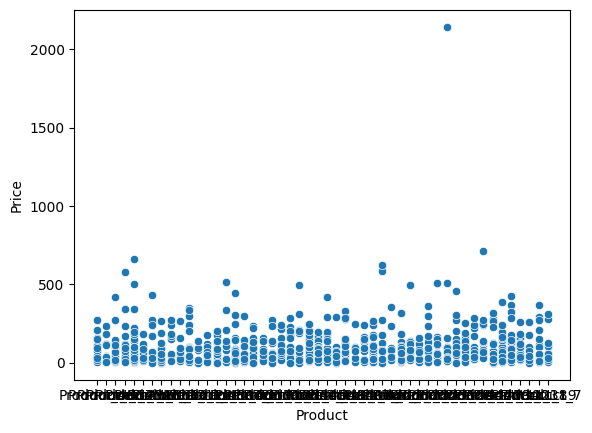

In [140]:
sns.scatterplot(x = 'Product', y = 'Price', data=sales_update)
# Scatterplot between product and price to compare data and identify any outliers

In [141]:
sales_update[sales_update['Price']>2000]
# Read index number of outlier from the scatterplot above

,Product,Region,Price,Units Sold,Sale Date
969,Product_15,Region_8,2143.3,5.0,2024-08-27


In [142]:
sales_update.drop(969, axis=0, inplace=True)
# Drop the outlier, i.e. product_15 in region_8 with a price of $2143.3

/var/folders/ht/6xpr92fx6hb_qsdf6ml3w35w0000gn/T/ipykernel_76773/3156360332.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_update.drop(969, axis=0, inplace=True)


In [143]:
sales_update[sales_update['Price']>2000]
# Validate whether outlier has been dropped from the dataset

,Product,Region,Price,Units Sold,Sale Date


In [144]:
sales_update[(sales_update['Product']=='Product_15')]
# Validate whether outlier has been dropped from the dataset

,Product,Region,Price,Units Sold,Sale Date
92,Product_15,Region_6,NaN,11.0,2022-04-03
217,Product_15,Region_4,38.10,10.0,2022-08-06
286,Product_15,Region_8,103.63,10.0,2022-10-14
356,Product_15,Region_10,37.14,7.0,2022-12-23
510,Product_15,Region_5,NaN,12.0,2023-05-26
552,Product_15,Region_8,94.30,14.0,2023-07-07
588,Product_15,Region_7,NaN,14.0,2023-08-12
595,Product_15,Region_10,13.02,7.0,2023-08-19
667,Product_15,Region_5,68.61,12.0,2023-10-30
745,Product_15,Region_9,29.56,11.0,2024-01-16


<Axes: xlabel='Product', ylabel='Price'>

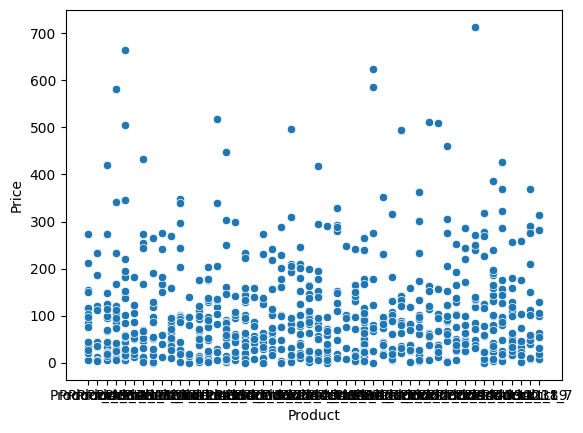

In [145]:
sns.scatterplot(x = 'Product', y = 'Price', data=sales_update)
# Update scatterplot between Product and Price post removal of outlier

<Axes: xlabel='Region', ylabel='Price'>

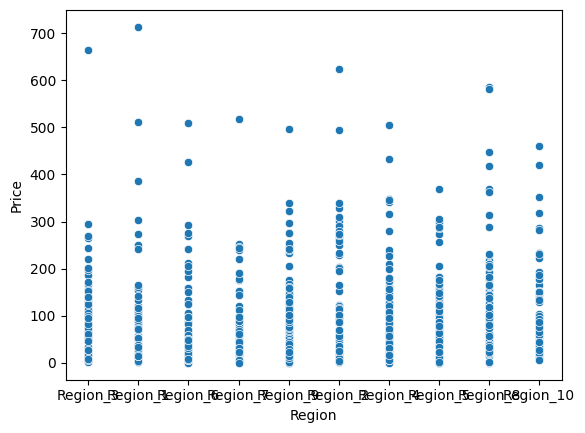

In [146]:
sns.scatterplot(x = 'Region', y = 'Price', data=sales_update)
# Scatterplot between region and price to identify any outliers across regions

In [153]:
sales_update[(sales_update['Region']=='Region_3') & (sales_update['Price']>600)]
# Read index value of outlier in region 3, i.e, first data label on the x-axis

,Product,Region,Price,Units Sold,Sale Date
728,Product_31,Region_3,665.0,9.0,2023-12-30


In [156]:
sales_update.to_csv('halfway_analysis.csv')
# Checkpoint 1

In [157]:
df = pd.read_csv('halfway_analysis.csv')

In [160]:
sales_update.drop(728, axis=0, inplace=True)
# Drop the outlier from region_3

/var/folders/ht/6xpr92fx6hb_qsdf6ml3w35w0000gn/T/ipykernel_76773/3222158675.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_update.drop(728, axis=0, inplace=True)


<Axes: xlabel='Region', ylabel='Price'>

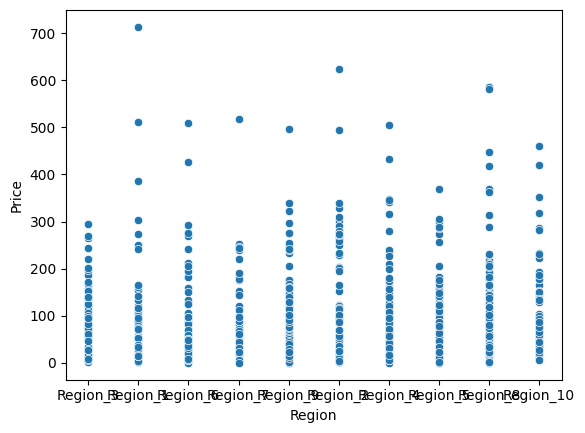

In [161]:
sns.scatterplot(x = 'Region', y = 'Price', data=sales_update)
# Updated scatterplot between Region and Price post removal of outlier from region_3

In [162]:
sales_update[(sales_update['Region']=='Region_1') & (sales_update['Price']>475)]
# Read index value of outlier in region 1, i.e, second data label on the x-axis

,Product,Region,Price,Units Sold,Sale Date
189,Product_35,Region_1,511.74,10.0,2022-07-09
853,Product_41,Region_1,713.29,10.0,2024-05-03


In [166]:
sales_update.drop(189, axis=0, inplace=True)
sales_update.drop(853, axis=0, inplace=True)
# Drop the outliers

/var/folders/ht/6xpr92fx6hb_qsdf6ml3w35w0000gn/T/ipykernel_76773/2021448631.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_update.drop(189, axis=0, inplace=True)
/var/folders/ht/6xpr92fx6hb_qsdf6ml3w35w0000gn/T/ipykernel_76773/2021448631.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_update.drop(853, axis=0, inplace=True)


In [165]:
sales_update.iloc(853)
# Validate whether outlier has been dropped, error message shows the outlier does not exist in the dataset anymore

ValueError: No axis named 853 for object type DataFrame

In [167]:
sales_update[(sales_update['Region']=='Region_6') & (sales_update['Price']>450)]
# Read index value of outlier in region 6, i.e, third data label on the x-axis

,Product,Region,Price,Units Sold,Sale Date
834,Product_15,Region_6,510.06,10.0,2024-04-14


In [168]:
sales_update.drop(834, inplace=True)
# Drop the outlier

/var/folders/ht/6xpr92fx6hb_qsdf6ml3w35w0000gn/T/ipykernel_76773/1456582645.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_update.drop(834, inplace=True)


In [169]:
sales_update.iloc(834)
# Validate whether outlier has been dropped, error message shows the outlier does not exist in the dataset anymore

ValueError: No axis named 834 for object type DataFrame

In [170]:
sales_update[(sales_update['Region']=='Region_7') & (sales_update['Price']>500)]
# # Read index value of outlier in region 7, i.e, fourth data label on the x-axis

,Product,Region,Price,Units Sold,Sale Date
264,Product_14,Region_7,517.29,10.0,2022-09-22


In [171]:
sales_update.drop(264, inplace=True)
# Drop the outlier

/var/folders/ht/6xpr92fx6hb_qsdf6ml3w35w0000gn/T/ipykernel_76773/375789478.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_update.drop(264, inplace=True)


In [172]:
sales_update.iloc(264)
# Validate whether outlier has been dropped, error message shows the outlier does not exist in the dataset anymore

ValueError: No axis named 264 for object type DataFrame

In [173]:
sales_update[(sales_update['Region']=='Region_9') & (sales_update['Price']>475)]
# Read index value of outlier in region 9, i.e, fifth data label on the x-axis

,Product,Region,Price,Units Sold,Sale Date
234,Product_34,Region_9,496.61,8.0,2022-08-23


In [174]:
sales_update.drop(234, inplace=True)
# Drop the outlier

/var/folders/ht/6xpr92fx6hb_qsdf6ml3w35w0000gn/T/ipykernel_76773/3016538705.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_update.drop(234, inplace=True)


In [175]:
sales_update[(sales_update['Region']=='Region_8') & (sales_update['Price']>550)]
# Read index value of outlier in region 8, i.e, sixth data label on the x-axis

,Product,Region,Price,Units Sold,Sale Date
437,Product_26,Region_8,585.17,13.0,2023-03-14
684,Product_45,Region_8,580.60,NaN,2023-11-16


In [176]:
sales_update.drop(437, inplace=True)
sales_update.drop(684, inplace=True)
# Drop the outliers

/var/folders/ht/6xpr92fx6hb_qsdf6ml3w35w0000gn/T/ipykernel_76773/3779959958.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_update.drop(437, inplace=True)
/var/folders/ht/6xpr92fx6hb_qsdf6ml3w35w0000gn/T/ipykernel_76773/3779959958.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_update.drop(684, inplace=True)


In [177]:
sales_update[(sales_update['Region']=='Region_4') & (sales_update['Price']>500)]
# Read index value of outlier in region 4, i.e, seventh data label on the x-axis

,Product,Region,Price,Units Sold,Sale Date
526,Product_31,Region_4,505.01,11.0,2023-06-11


In [178]:
sales_update.drop(526, inplace=True)
# Drop the outlier

/var/folders/ht/6xpr92fx6hb_qsdf6ml3w35w0000gn/T/ipykernel_76773/1506388208.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_update.drop(526, inplace=True)


In [180]:
sales_update[(sales_update['Region']=='Region_2') & (sales_update['Price']>480)]
# Read index value of outlier in region 2, i.e, eighth data label on the x-axis

,Product,Region,Price,Units Sold,Sale Date
293,Product_22,Region_2,493.2,NaN,2022-10-21
814,Product_26,Region_2,623.6,12.0,2024-03-25


In [181]:
sales_update.drop(293, inplace=True)
sales_update.drop(814, inplace=True)
# Drop the outliers

/var/folders/ht/6xpr92fx6hb_qsdf6ml3w35w0000gn/T/ipykernel_76773/1188361708.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_update.drop(293, inplace=True)
/var/folders/ht/6xpr92fx6hb_qsdf6ml3w35w0000gn/T/ipykernel_76773/1188361708.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_update.drop(814, inplace=True)


<Axes: xlabel='Region', ylabel='Price'>

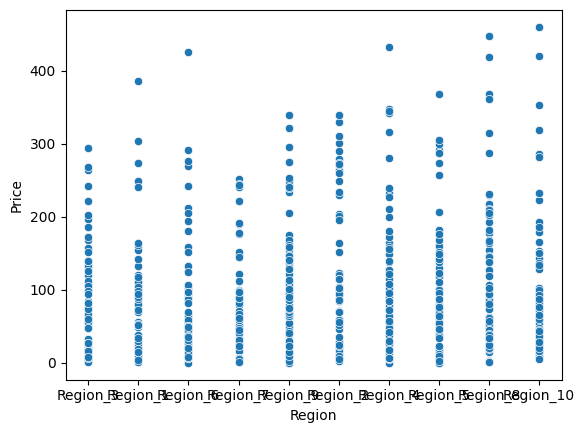

In [182]:
sns.scatterplot(x = 'Region', y = 'Price', data=sales_update)
# Updated scatterplot between region and price post removal of outliers

In [183]:
sales_update[(sales_update['Region']=='Region_6') & (sales_update['Price']>400)]
# Read index value of outlier in region 6, to further clean the data

,Product,Region,Price,Units Sold,Sale Date
500,Product_40,Region_6,426.02,NaN,2023-05-16


In [184]:
sales_update.drop(500, inplace=True)
# Drop the outlier

/var/folders/ht/6xpr92fx6hb_qsdf6ml3w35w0000gn/T/ipykernel_76773/1198129220.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_update.drop(500, inplace=True)


<Axes: xlabel='Region', ylabel='Price'>

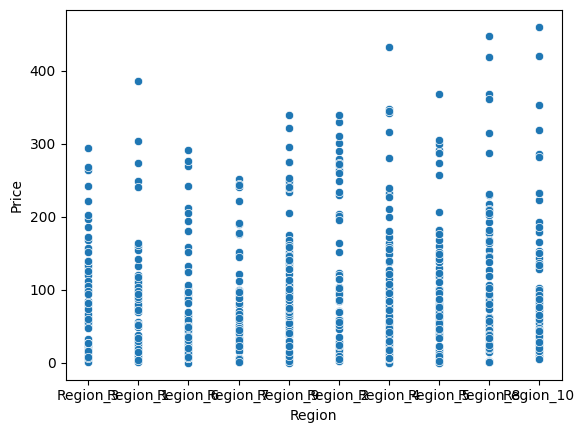

In [185]:
sns.scatterplot(x = 'Region', y = 'Price', data=sales_update)
# Updated scatterplot between Region and Price post removal of outlier

In [187]:
sales_update.head(50)
# Read first 50 values of the data

,Product,Region,Price,Units Sold,Sale Date
2,Product_46,Region_3,20.43,12.0,2022-01-03
3,Product_36,Region_1,12.77,10.0,2022-01-04
4,Product_17,Region_6,125.69,6.0,2022-01-05
5,Product_45,Region_1,8.63,11.0,2022-01-06
6,Product_31,Region_3,23.73,6.0,2022-01-07
7,Product_18,Region_7,19.27,9.0,2022-01-08
8,Product_16,Region_9,30.70,14.0,2022-01-09
9,Product_9,Region_2,264.05,7.0,2022-01-10
10,Product_20,Region_3,NaN,8.0,2022-01-11
11,Product_1,Region_4,63.04,9.0,2022-01-12


In [188]:
group = sales_update.groupby('Product')
# Group the data by product post removal of outliers

In [189]:
group.groups
# Read created group values by Product

{'Product_1': [11, 13, 15, 34, 88, 140, 213, 265, 312, 393, 407, 467, 563, 609, 711, 848, 931, 964, 994], 'Product_10': [47, 84, 220, 253, 294, 375, 397, 449, 599, 643, 673, 754, 895, 934], 'Product_11': [26, 70, 256, 361, 371, 391, 455, 809, 868, 971], 'Product_12': [59, 172, 173, 245, 311, 521, 536, 576, 627, 801, 882], 'Product_13': [25, 35, 49, 94, 113, 156, 204, 237, 295, 326, 343, 364, 389, 403, 522, 621, 676, 720, 746, 752, 807, 892, 954, 962], 'Product_14': [22, 230, 232, 351, 468, 473, 546, 574, 651, 672, 832, 845, 889, 978], 'Product_15': [92, 217, 286, 356, 510, 552, 588, 595, 667, 745, 780, 849, 924, 958, 980], 'Product_16': [8, 146, 153, 180, 275, 466, 491, 505, 547, 674, 721, 735, 783, 796, 819, 914, 916, 930], 'Product_17': [4, 17, 51, 71, 72, 122, 148, 192, 227, 267, 313, 533, 614, 624, 712, 716, 739, 741], 'Product_18': [7, 65, 67, 249, 252, 254, 316, 376, 383, 502, 523, 899, 942], 'Product_19': [212, 244, 258, 269, 352, 378, 433, 496, 512, 528, 589, 600, 607, 611, 641

In [199]:
group.get_group('Product_1')
# Read all values any particular product, in this case Product_1

,Product,Region,Price,Units Sold,Sale Date
11,Product_1,Region_4,63.04,9.0,2022-01-12
13,Product_1,Region_4,10.15,8.0,2022-01-14
15,Product_1,Region_2,46.23,11.0,2022-01-16
34,Product_1,Region_9,47.90,11.0,2022-02-04
88,Product_1,Region_2,85.46,10.0,2022-03-30
140,Product_1,Region_4,28.61,9.0,2022-05-21
213,Product_1,Region_6,NaN,8.0,2022-08-02
265,Product_1,Region_1,158.05,8.0,2022-09-23
312,Product_1,Region_3,NaN,10.0,2022-11-09
393,Product_1,Region_6,64.53,10.0,2023-01-29


In [203]:
sales_update.groupby('Product')['Price'].mean()
# Group all values by Product and calculate their average price

Product
Product_1      76.383125
Product_10     61.070833
Product_11     73.550000
Product_12     93.483333
Product_13     88.530000
Product_14    102.279231
Product_15     57.837273
Product_16    104.196471
Product_17     96.859412
Product_18     63.447500
Product_19    126.922941
Product_2     135.143333
Product_20    143.653333
Product_21     95.285714
Product_22     79.967273
Product_23    113.052667
Product_24    118.157500
Product_25    110.250000
Product_26    100.463333
Product_27     78.409286
Product_28     95.639167
Product_29    125.308824
Product_3      52.188571
Product_30    120.916316
Product_31     98.815789
Product_32     63.106000
Product_33     86.831053
Product_34    105.961538
Product_35     83.065833
Product_36     83.146364
Product_37     91.135625
Product_38     73.716364
Product_39    113.652143
Product_4      85.001111
Product_40    128.303750
Product_41    122.766154
Product_42     83.197692
Product_43     64.982778
Product_44     96.577857
Product_45     92

In [204]:
sales_update['Price'] = sales_update['Price'].fillna(sales_update.groupby('Product')['Price'].transform('mean'))
# Fill all null price values for each product with the respective means

/var/folders/ht/6xpr92fx6hb_qsdf6ml3w35w0000gn/T/ipykernel_76773/602060751.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_update['Price'] = sales_update['Price'].fillna(sales_update.groupby('Product')['Price'].transform('mean'))


In [210]:
sales_update['Price'].isnull().values.any()
# Validate if above command was successful by calling any null price values, a false result shows that all null values have been filled

False

In [222]:
group.get_group('Product_1')
# Check if all missing price values for Product_1 have been filled with the average price of all Product_1 price values
# Price values of indexes 213, 312 and 931 were missing initially and have been filled with mean[76.383125] of Product_1 price values now

,Product,Region,Price,Units Sold,Sale Date
11,Product_1,Region_4,63.040000,9.0,2022-01-12
13,Product_1,Region_4,10.150000,8.0,2022-01-14
15,Product_1,Region_2,46.230000,11.0,2022-01-16
34,Product_1,Region_9,47.900000,11.0,2022-02-04
88,Product_1,Region_2,85.460000,10.0,2022-03-30
140,Product_1,Region_4,28.610000,9.0,2022-05-21
213,Product_1,Region_6,76.383125,8.0,2022-08-02
265,Product_1,Region_1,158.050000,8.0,2022-09-23
312,Product_1,Region_3,76.383125,10.0,2022-11-09
393,Product_1,Region_6,64.530000,10.0,2023-01-29


<Axes: xlabel='Product', ylabel='Price'>

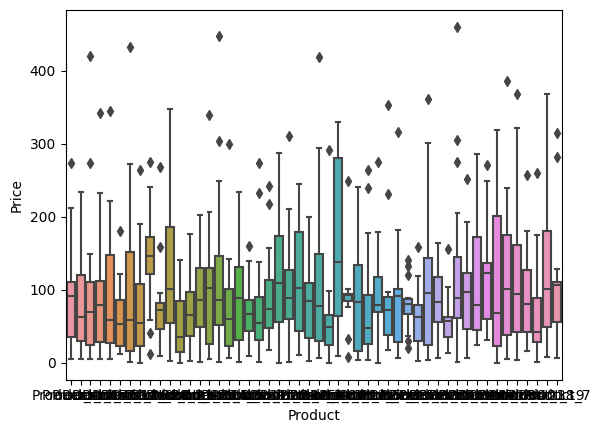

In [257]:
sns.boxplot(data = sales_update, x = 'Product', y = 'Price')
# Boxplot between product and price to idenitfy any remaining outliers

In [258]:
sales_update.info()
# Gather information about updated dataset post removal of outliers

<class 'pandas.core.frame.DataFrame'>
Index: 797 entries, 2 to 999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     797 non-null    object 
 1   Region      797 non-null    object 
 2   Price       797 non-null    float64
 3   Units Sold  721 non-null    float64
 4   Sale Date   797 non-null    object 
dtypes: float64(2), object(3)
memory usage: 69.6+ KB


In [261]:
sales_update['Price'].mean()
# Calculate updated mean of the update dataset

96.1084377392872

In [262]:
sales1 = sales_update[sales_update['Price']<375]
# Create a new variable 'sales 1' with price values < $375 to further clean the data and remove outliers

In [264]:
sales1.info()
# Gather information about updated dataset post removal of outliers

<class 'pandas.core.frame.DataFrame'>
Index: 791 entries, 2 to 999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     791 non-null    object 
 1   Region      791 non-null    object 
 2   Price       791 non-null    float64
 3   Units Sold  715 non-null    float64
 4   Sale Date   791 non-null    object 
dtypes: float64(2), object(3)
memory usage: 37.1+ KB


<Axes: xlabel='Product', ylabel='Price'>

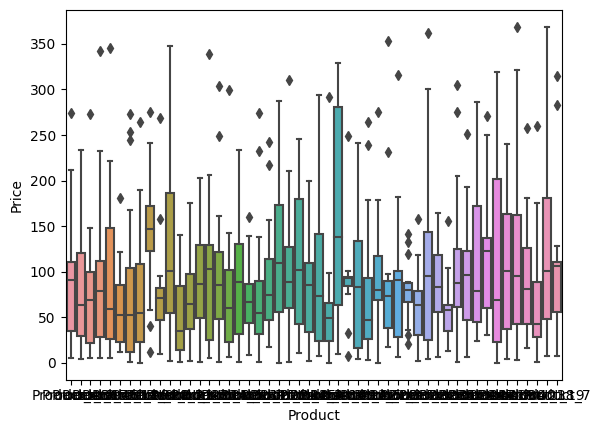

In [265]:
sns.boxplot(data = sales1, x = 'Product', y = 'Price')
# Create a boxplot between Product and Price values to visualize the data

In [303]:
sales1['Sales'] = sales1['Price']*sales['Units Sold']
# Creat a new variable and calculating the sales for each entry by multiplying product price and number of units sold 

/var/folders/ht/6xpr92fx6hb_qsdf6ml3w35w0000gn/T/ipykernel_76773/3646985870.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales1['Sales'] = sales1['Price']*sales['Units Sold']


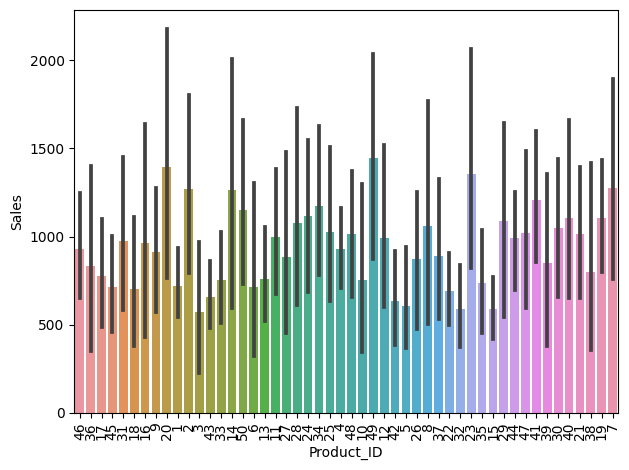

In [337]:
sns.barplot(data = sales1, x = 'Product_ID', y = 'Sales')
plt.xticks(rotation=90)
plt.tight_layout()
# Create a barplot between Product_ID and Sales to assess the correlation between the two parameters and note the products with the highest and lowest sales
# and to analyse the sales performance by product

In [271]:
sales1['Product_ID'] = sales1['Product'].str[8:10]
# Create a new column named Product_ID and store the product numbers to increase readability

/var/folders/ht/6xpr92fx6hb_qsdf6ml3w35w0000gn/T/ipykernel_76773/2570005307.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales1['Product_ID'] = sales1['Product'].str[8:10]


In [302]:
df_product10 = sales1[(sales1['Product_ID']=='1')|(sales1['Product_ID']=='2')|(sales1['Product_ID']=='3')|(sales1['Product_ID']=='4')|(sales1['Product_ID']=='5')|(sales1['Product_ID']=='6')|(sales1['Product_ID']=='7')|(sales1['Product_ID']=='8')|(sales1['Product_ID']=='9')|(sales1['Product_ID']=='10')]
# Create new variable df_product10 and store the sales value of first 10 products of the dataset

<Axes: xlabel='Product_ID', ylabel='Sales'>

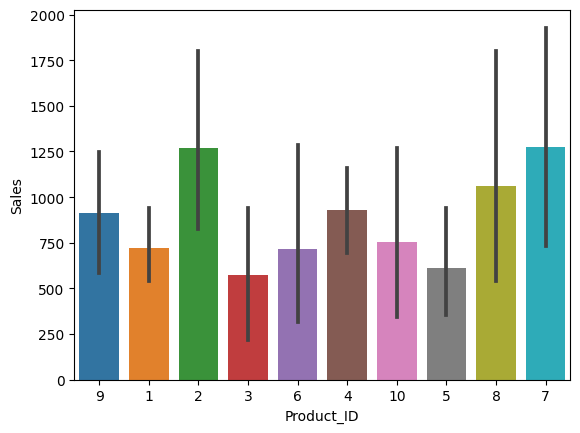

In [338]:
sns.barplot(data = df_product10, x = 'Product_ID', y = 'Sales')
# Create barplot between the first 10 products and sales to better understand the data

<Axes: xlabel='Region', ylabel='Sales'>

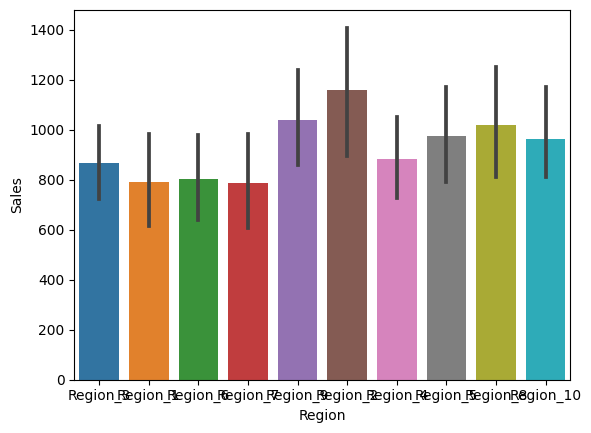

In [314]:
sns.barplot(data = sales1, x = 'Region', y = 'Sales')
# Create barplot between Region and Sales post removal of outliers to analyse the sales performance by region

In [315]:
sales1['Region_ID'] = sales1['Region'].str[7:9]
# Command to create a new column named Region_ID and store the region numbers to increase readability

/var/folders/ht/6xpr92fx6hb_qsdf6ml3w35w0000gn/T/ipykernel_76773/4040351046.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales1['Region_ID'] = sales1['Region'].str[7:9]


In [316]:
sales1

,Product,Region,Price,Units Sold,Sale Date,Product_ID,Sales,Region_ID
2,Product_46,Region_3,20.43,12.0,2022-01-03,46,245.16,3
3,Product_36,Region_1,12.77,10.0,2022-01-04,36,127.70,1
4,Product_17,Region_6,125.69,6.0,2022-01-05,17,754.14,6
5,Product_45,Region_1,8.63,11.0,2022-01-06,45,94.93,1
6,Product_31,Region_3,23.73,6.0,2022-01-07,31,142.38,3
...,...,...,...,...,...,...,...,...
988,Product_42,Region_9,240.97,NaN,2024-09-15,42,NaN,9
993,Product_7,Region_9,128.51,17.0,2024-09-20,7,2184.67,9
994,Product_1,Region_4,95.24,7.0,2024-09-21,1,666.68,4
998,Product_2,Region_10,43.44,15.0,2024-09-25,2,651.60,10


<Axes: xlabel='Region_ID', ylabel='Sales'>

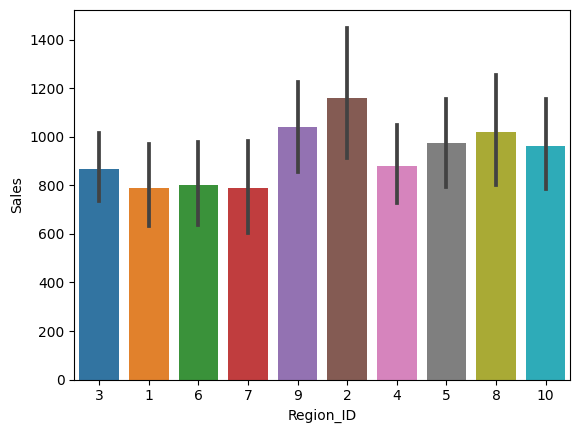

In [317]:
sns.barplot(data = sales1, x = 'Region_ID', y = 'Sales')
# Create barplot between Region and Sales post removal of outliers to analyse the sales performance by region

In [328]:
sales1['Sale_Month'] = sales1['Sale Date'].str[5:7]
# Create a new column named Sale_Month and store the months to potentially assess monthly sales

/var/folders/ht/6xpr92fx6hb_qsdf6ml3w35w0000gn/T/ipykernel_76773/2791032414.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales1['Sale_Month'] = sales1['Sale Date'].str[5:7]


In [339]:
sales1['Sale_Year'] = sales1['Sale Date'].str[0:4]
# Create a new column named Sale_Year and store the year to potentially assess yearly sales

/var/folders/ht/6xpr92fx6hb_qsdf6ml3w35w0000gn/T/ipykernel_76773/4282201095.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales1['Sale_Year'] = sales1['Sale Date'].str[0:4]


In [340]:
sales1
# Read updated dataset post transformation 

,Product,Region,Price,Units Sold,Sale Date,Product_ID,Sales,Region_ID,Sale_Month,Sale_Year
2,Product_46,Region_3,20.43,12.0,2022-01-03,46,245.16,3,01,2022
3,Product_36,Region_1,12.77,10.0,2022-01-04,36,127.70,1,01,2022
4,Product_17,Region_6,125.69,6.0,2022-01-05,17,754.14,6,01,2022
5,Product_45,Region_1,8.63,11.0,2022-01-06,45,94.93,1,01,2022
6,Product_31,Region_3,23.73,6.0,2022-01-07,31,142.38,3,01,2022
...,...,...,...,...,...,...,...,...,...,...
988,Product_42,Region_9,240.97,NaN,2024-09-15,42,NaN,9,09,2024
993,Product_7,Region_9,128.51,17.0,2024-09-20,7,2184.67,9,09,2024
994,Product_1,Region_4,95.24,7.0,2024-09-21,1,666.68,4,09,2024
998,Product_2,Region_10,43.44,15.0,2024-09-25,2,651.60,10,09,2024


<Axes: xlabel='Sale_Month', ylabel='Sales'>

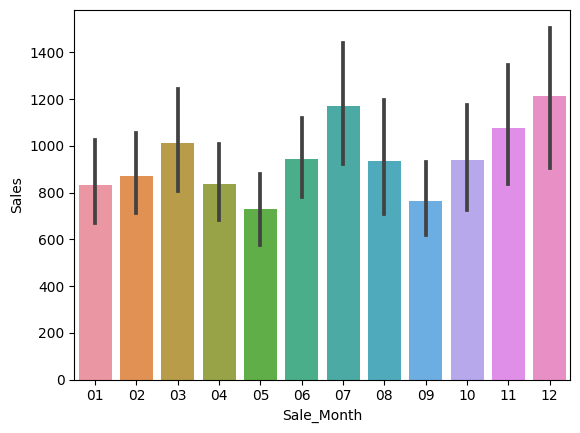

In [330]:
sns.barplot(data = sales1, x = 'Sale_Month', y = 'Sales')
# Create a bar plot between Sale_Month and Sales to assess the correlation between the two parameters and to analyse the sales performance by month

<Axes: xlabel='Sale_Year', ylabel='Sales'>

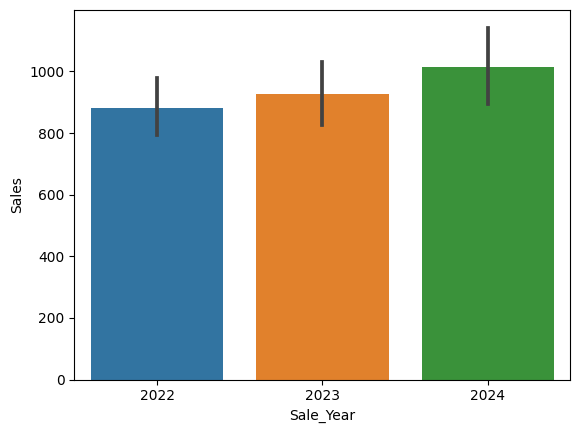

In [341]:
sns.barplot(data = sales1, x = 'Sale_Year', y = 'Sales')
# Creating a bar plot between Sale_Year and Sales to assess the correlation between the two parameters and to analyse the yearly sales performance 

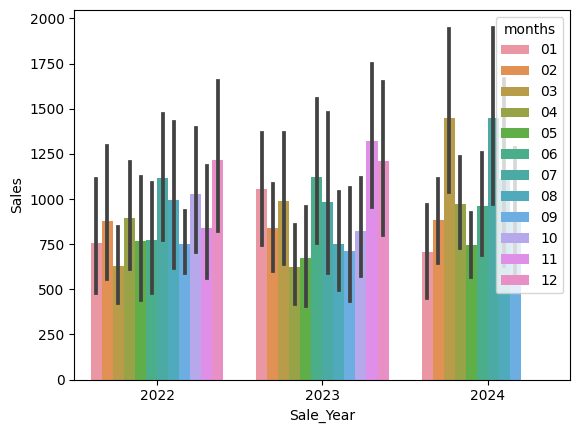

In [348]:
sns.barplot( data=sales1, x = 'Sale_Year', y = 'Sales', hue = 'Sale_Month')
plt.legend(loc = 'upper right', title = 'months')
# Create a bar plot between Sale_Year, color encoded by Sale_Month and Sales to assess the variation in yearly sales by months

In [ ]:
Question: What conclusions can you draw about sales performance of various products and regions?

Answer: Using the bar plot between Product ID and Sales, we can gather that though nearly all products have average sales higher than $500 
across the three years (2022-2024), only select products have an average sale higher than $1000 for the same period. Based on the same plot, we can 
identify that Product_49 has the highest average sale of approximately $1490 across the three years. Product_20 and Product_23 compete for 2nd place 
with an approximate average sale of $1470 to $1480 across the three years. Out of all the 50 products, product #3 has the lowest average three-year sales 
of over $500.
From the Region vs. Sales bar plot it is evident that Region_2 has the highest average sale over the years 2022 through 2024 and Region_7 
has the lowest average sales of approximately $800, across all the ten regions.
To further assess the variation in Sales by months and years, I created the following bar plots. Through the bar plot between month and sales, we can 
effectively communicate that sales in December and July are the highest, almost $1200 and average sales across products and 
regions were lowest, less than $800, in May. If we look at the quarterly sales data, an interesting point is a surge in sales in the last 
month of every quarter except the third, where we see an opposite trend, where the last month has the lowest and the first month had the highest sales.
Looking at the yearly sales data for 2022 through 2024, it is clear that 2024 will have the highest sales crossing the average of $1000. 
Though we only have the sales data for September 2024, there is a possibility the average sales might be even higher than anticipated due to trends in 
previous years (2022 and 2023), i.e., relatively high sales in November and December across years. Also, sales within July and December are 
relatively high compared to other months, and a hypothesis could be that it’s because of Canada’s national holiday, Christmas and New Year discounts


In [ ]:
Question: What recommendations do you have for the business?

Answer: Based on the data given I would make the following recommendations to my company’s strategy insights and planning team.

The company should first identify the problem areas

Firstly, identify the drivers and barriers for all products with the lowest sales, in this case, products 3,5,15, 32 and 42, to assess the rationale 
and factors contributing to such low sales over three years. 
•	To understand the drivers and barriers to using these products, the company can survey consumers about product satisfaction and attributes leading to 
high and low usage of each product among these numbers. 
•	To effectively and accurately assess the rationale behind the low sales of these products, the company should plan to launch the survey to quality 
respondents, i.e., a mix of users and non-users and within users – high, low and medium users – to get a complete perspective from each class of consumers.

Secondly, assess the reasons for low sales in regions 1, 6 and 7 by extracting consumer needs and product availability differences. 
•	For example, suppose there is a higher need for Product_1 in an area, but the availability and sales of Product_3 are relatively higher. 
In that case, it can lead to a discrepancy and ultimately lower regional market presence.

Thirdly, identify trends within low periods of success and attributes that contribute to these low sales and devise strategies to avoid those low periods. 
•	For example, an evident trend from the bar plot between year, color encoded by Month, and Sales is every year, the sales in July and December are 
relatively higher, which could be because of Canada’s national holiday, Christmas and New Year discount offers. 

Lastly, the company should devise a correlation between Product, Region, Time and Sales to effectively evaluate any gaps or trends in sales and develop 
strategies to resolve any identified barriers or reinforce the use of certain products.



Recommendations to mitigate the gaps in sales by Product, Region and Time

Post-identifying drivers and barriers of products with the lowest sales, the company should implement a robust advertising approach to market the key 
strengths of their products and look for resolutions to obstacles for each products.
•	Another way to increase the sales of these products is to assess the customer segments that prefer these items and devise tailored promotional strategies and marketing campaigns to create a niche for the product, potentially eliminating all competitors within that segment.

Understanding consumer preferences, purchase history and demographic differences is essential when looking at the region-wise data. 
•	The company should alter their product range based on the insights extrapolated from the above analysis strategy, diversifying its product offerings 
and reducing reliance on products that experience significant fluctuations in sales and on products that do not meet the needs of the consumers within a 
particular region.

Create targeted marketing campaigns and promotions that mirror high sales months. 
•	Offer discounts, deals and exclusive offers across seasons and significant festivals to appeal to a more diversified population and culture and 
capitalize on the increased demand and interest towards various products. Consequently, offer incentives or reward points for customer referrals to 
boost sales and intrigue interest in the brand during low periods. 


In [ ]:
Question: Describe your data cleaning approach. How and why did you decide on which cleaning techniques to use?

Cleaning the data is an essential step before processing and analysing the data as it not only helps to enhance the data quality but also ensure that’s the data being analysed is consistent and reliable, thus yielding accurate results.
I took the following approach to clean the data at hand, in the mentioned order:-

Removed duplicate entries  - Identified and dropped all duplicate records from the dataset to avoid redundancy that may skew the analysis and ensure data integrity.

Identified and removed null values from ‘Product’ and ‘Region’ columns – Dropped all NaN values from the mentioned columns to avoid any missing values due to difficulty in interpreting the product and region from numerical values

Handled Outliers – Detecting and removing outliers from the dataset as they can significantly deviate the data and potentially the analyses
•	Used scatterplots (Product vs. Price and Region vs. Price) through the seaborn library to identify the outliers and dropped all extreme and erroneous values 

Handled missing values – Imputed all missing values in the ‘Price’ column by grouping all values by ‘Product’ and calculating the mean ‘Price’ for each product across regions. Consequently substituted all missing values by the mean of their respective product price.

Data Transformation – Split certain columns such as ‘Sale Date’ into ‘Sale_Month’ and ‘Sale_Year’, and ‘Product’ and ‘Region’ into ‘Product_ID’ and ‘Region_ID’ respectively to ease data readability and data visualization, thus producing cleaner graphs.
